<a href="https://www.kaggle.com/code/arin8830/mental-disorder-classification?scriptVersionId=254616206" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mental-disorder-classification/Dataset-Mental-Disorders.csv


In [2]:
df=pd.read_csv("/kaggle/input/mental-disorder-classification/Dataset-Mental-Disorders.csv")
df.head(5)

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [3]:
df.shape

(120, 19)

In [4]:
df.dtypes

Patient Number         object
Sadness                object
Euphoric               object
Exhausted              object
Sleep dissorder        object
Mood Swing             object
Suicidal thoughts      object
Anorxia                object
Authority Respect      object
Try-Explanation        object
Aggressive Response    object
Ignore & Move-On       object
Nervous Break-down     object
Admit Mistakes         object
Overthinking           object
Sexual Activity        object
Concentration          object
Optimisim              object
Expert Diagnose        object
dtype: object

In [5]:
df.describe().transpose()

,count,unique,top,freq
Patient Number,120,120,Patiant-01,1
Sadness,120,4,Usually,42
Euphoric,120,4,Seldom,46
Exhausted,120,4,Sometimes,38
Sleep dissorder,120,4,Sometimes,44
Mood Swing,120,2,NO,63
Suicidal thoughts,120,3,NO,63
Anorxia,120,2,NO,74
Authority Respect,120,2,NO,73
Try-Explanation,120,2,NO,63


In [6]:
df.isnull().sum()

Patient Number         0
Sadness                0
Euphoric               0
Exhausted              0
Sleep dissorder        0
Mood Swing             0
Suicidal thoughts      0
Anorxia                0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Sexual Activity        0
Concentration          0
Optimisim              0
Expert Diagnose        0
dtype: int64

In [7]:
duplicate_rows = df[df.duplicated()]
duplicate_rows.sum()

Patient Number         0
Sadness                0
Euphoric               0
Exhausted              0
Sleep dissorder        0
Mood Swing             0
Suicidal thoughts      0
Anorxia                0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Sexual Activity        0
Concentration          0
Optimisim              0
Expert Diagnose        0
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    object
 6   Suicidal thoughts    120 non-null    object
 7   Anorxia              120 non-null    object
 8   Authority Respect    120 non-null    object
 9   Try-Explanation      120 non-null    object
 10  Aggressive Response  120 non-null    object
 11  Ignore & Move-On     120 non-null    object
 12  Nervous Break-down   120 non-null    object
 13  Admit Mistakes       120 non-null    object
 14  Overthinking         120 non-null    object
 15  Sexual Activity      120 non-null    object
 16  Concentr

In [9]:
df.head(5)

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [10]:
df = df.drop('Patient Number', axis=1)
df.head(5)

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


**Unique Values**

In [11]:
for column in df.columns:
    unique_count = df[column].nunique()
    unique_values = df[column].unique()

    print(f"The number of unique values in {column}: {unique_count}")
    print(f"Unique values in {column}:")
    for value in unique_values:
          print(value)
    print('\n')

The number of unique values in Sadness: 4
Unique values in Sadness:
Usually
Sometimes
Seldom
Most-Often


The number of unique values in Euphoric: 4
Unique values in Euphoric:
Seldom
Most-Often
Usually
Sometimes


The number of unique values in Exhausted: 4
Unique values in Exhausted:
Sometimes
Usually
Seldom
Most-Often


The number of unique values in Sleep dissorder: 4
Unique values in Sleep dissorder:
Sometimes
Most-Often
Usually
Seldom


The number of unique values in Mood Swing: 2
Unique values in Mood Swing:
YES
NO


The number of unique values in Suicidal thoughts: 3
Unique values in Suicidal thoughts:
YES 
YES
NO


The number of unique values in Anorxia: 2
Unique values in Anorxia:
NO
YES


The number of unique values in Authority Respect: 2
Unique values in Authority Respect:
NO
YES


The number of unique values in Try-Explanation: 2
Unique values in Try-Explanation:
YES
NO


The number of unique values in Aggressive Response: 2
Unique values in Aggressive Response:
NO
YES


T

In [12]:
df['Suicidal thoughts'].value_counts()


Suicidal thoughts
NO      63
YES     56
YES      1
Name: count, dtype: int64

In [13]:
df['Suicidal thoughts']=df['Suicidal thoughts'].replace('YES ', "YES")
df['Suicidal thoughts'].value_counts()

Suicidal thoughts
NO     63
YES    57
Name: count, dtype: int64

In [14]:
df['Expert Diagnose'].value_counts()


Expert Diagnose
Bipolar Type-2    31
Depression        31
Normal            30
Bipolar Type-1    28
Name: count, dtype: int64

In [15]:
ED1={'Normal': 0, 'Bipolar Type-1': 1, 'Bipolar Type-2': 2, 'Depression': 3}
df['Expert Diagnose']=df['Expert Diagnose'].map(ED1).astype(int)
df.head(5)

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,2
1,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,3
2,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,1
3,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,2
4,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,0


In [16]:
from sklearn.preprocessing import LabelEncoder


la = LabelEncoder()


en = [
    "Mood Swing", "Suicidal thoughts", "Anorxia", "Authority Respect", 
    "Try-Explanation", "Aggressive Response", "Ignore & Move-On", 
    "Nervous Break-down", "Admit Mistakes", "Overthinking"
]


for col in en:
    df[col] = la.fit_transform(df[col])

df.head(5)


,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,1,1,0,0,1,0,0,1,1,1,3 From 10,3 From 10,4 From 10,2
1,Usually,Seldom,Usually,Sometimes,0,1,0,0,0,0,0,0,0,0,4 From 10,2 From 10,5 From 10,3
2,Sometimes,Most-Often,Sometimes,Sometimes,1,0,0,0,1,1,0,1,1,0,6 From 10,5 From 10,7 From 10,1
3,Usually,Seldom,Usually,Most-Often,1,1,1,0,1,0,0,0,0,0,3 From 10,2 From 10,2 From 10,2
4,Usually,Usually,Sometimes,Sometimes,0,0,0,0,0,0,0,1,1,1,5 From 10,5 From 10,6 From 10,0


In [17]:
extratcd = ['Sexual Activity', 'Concentration', 'Optimisim']
for column in extratcd :
    df[column] = df[column].astype(str).str.extract('(\d)')
    df[column] = pd.to_numeric(df[column])
df.head(5)

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,1,1,0,0,1,0,0,1,1,1,3,3,4,2
1,Usually,Seldom,Usually,Sometimes,0,1,0,0,0,0,0,0,0,0,4,2,5,3
2,Sometimes,Most-Often,Sometimes,Sometimes,1,0,0,0,1,1,0,1,1,0,6,5,7,1
3,Usually,Seldom,Usually,Most-Often,1,1,1,0,1,0,0,0,0,0,3,2,2,2
4,Usually,Usually,Sometimes,Sometimes,0,0,0,0,0,0,0,1,1,1,5,5,6,0


In [18]:
la = LabelEncoder()


sfen= ['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder']

for col in sfen:
    df[col] = la.fit_transform(df[col])

df.head(5)


,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,3,1,2,2,1,1,0,0,1,0,0,1,1,1,3,3,4,2
1,3,1,3,2,0,1,0,0,0,0,0,0,0,0,4,2,5,3
2,2,0,2,2,1,0,0,0,1,1,0,1,1,0,6,5,7,1
3,3,1,3,0,1,1,1,0,1,0,0,0,0,0,3,2,2,2
4,3,3,2,2,0,0,0,0,0,0,0,1,1,1,5,5,6,0


**EDA**

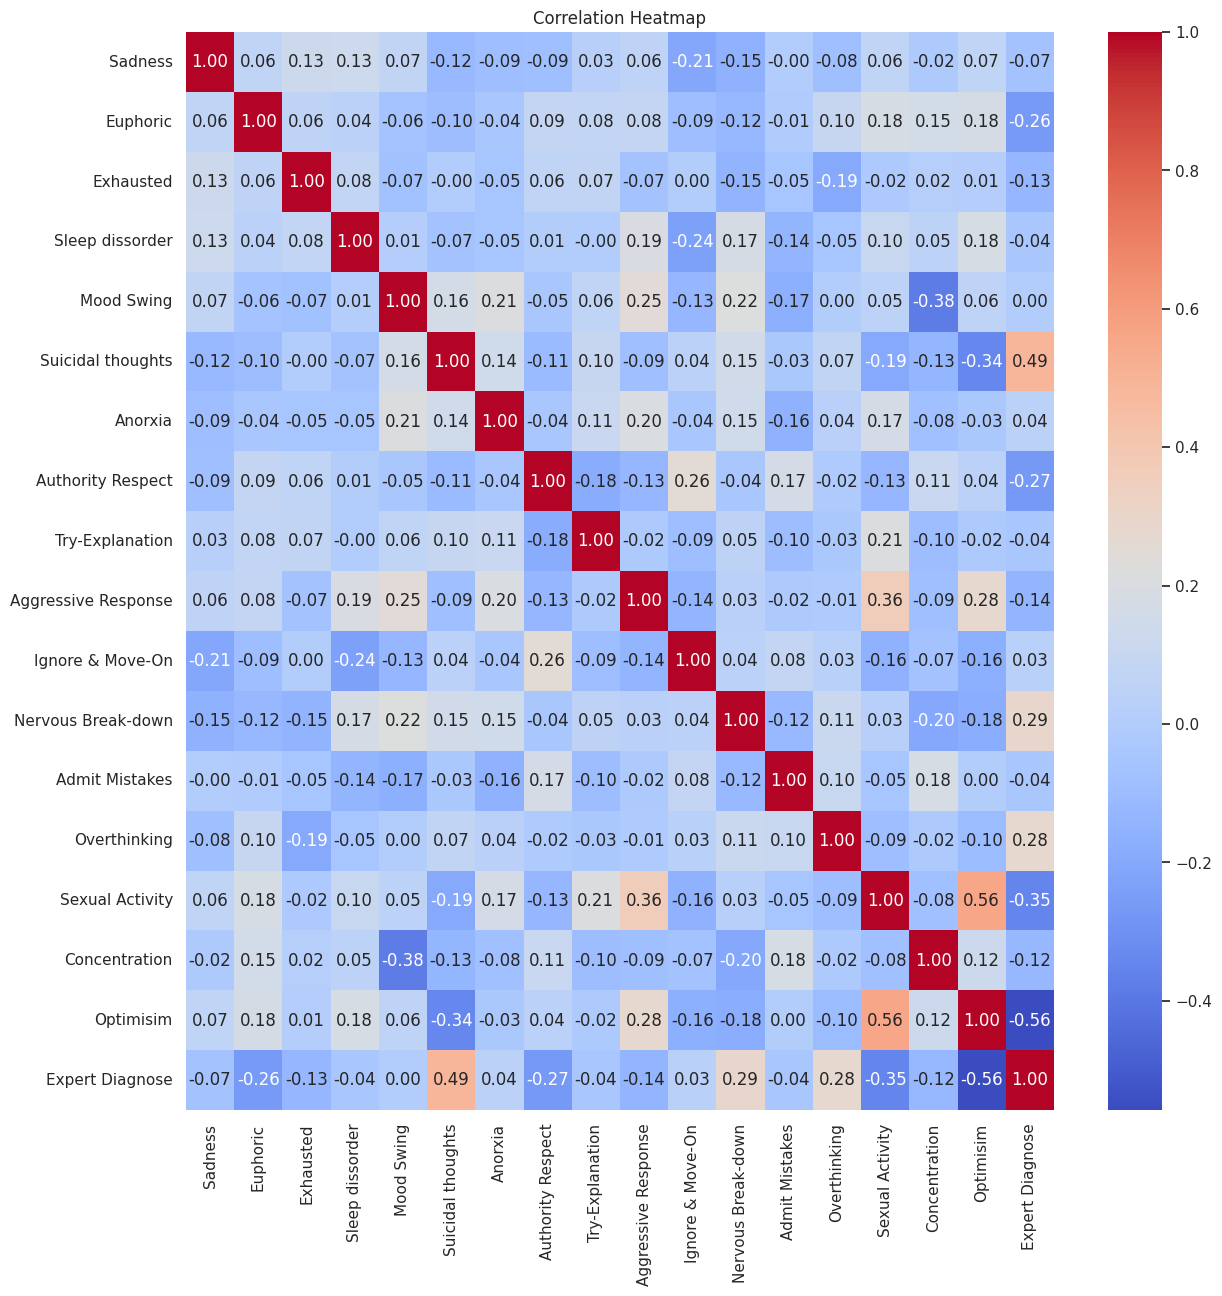

In [19]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

correlation_matrix = df.corr()

# create a heatmap
plt.figure(figsize=(14, 14))
heatmap = sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = 'coolwarm')

plt.title('Correlation Heatmap')
plt.show()

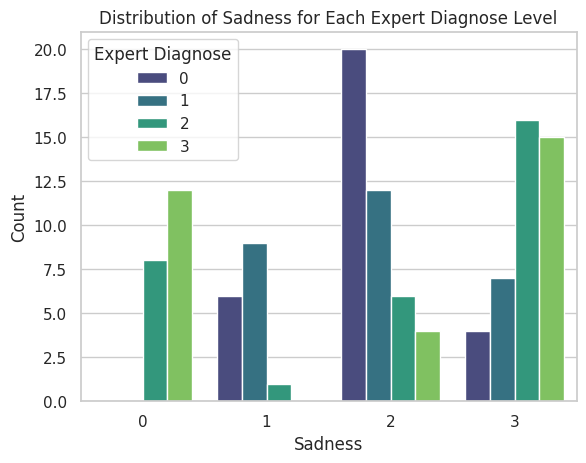

In [20]:
sns.countplot(x = 'Sadness', hue = 'Expert Diagnose', data = df, palette = 'viridis')
plt.title('Distribution of Sadness for Each Expert Diagnose Level')
plt.xlabel('Sadness')
plt.ylabel('Count')
plt.show()

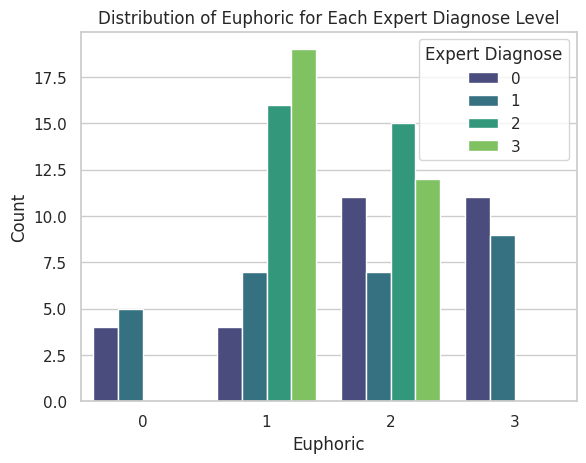

In [21]:
sns.countplot(x = 'Euphoric', hue = 'Expert Diagnose', data = df, palette = 'viridis')
plt.title('Distribution of Euphoric for Each Expert Diagnose Level')
plt.xlabel('Euphoric')
plt.ylabel('Count')
plt.show()

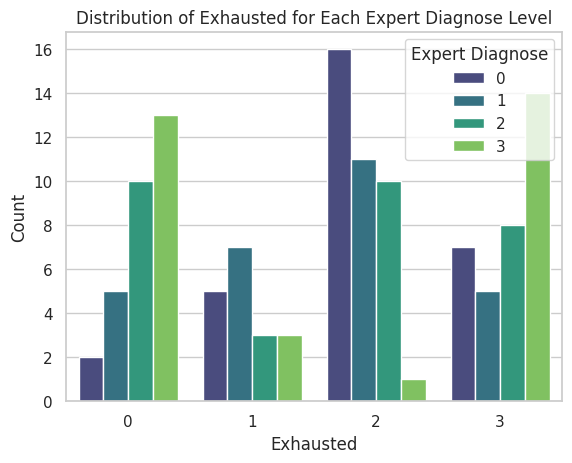

In [22]:
sns.countplot(x = 'Exhausted', hue = 'Expert Diagnose', data = df, palette = 'viridis')
plt.title('Distribution of Exhausted for Each Expert Diagnose Level')
plt.xlabel('Exhausted')
plt.ylabel('Count')
plt.show()

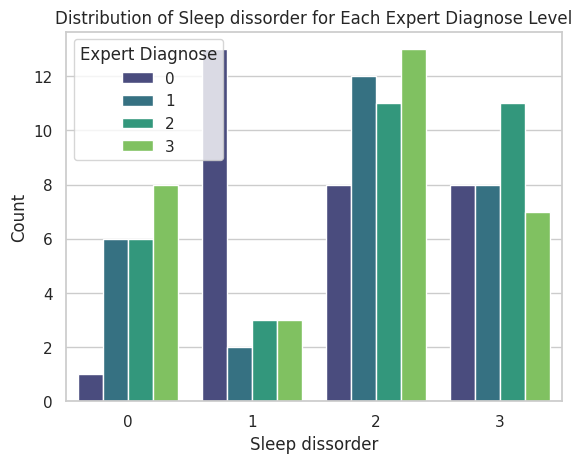

In [23]:
sns.countplot(x = 'Sleep dissorder', hue = 'Expert Diagnose', data = df, palette = 'viridis')
plt.title('Distribution of Sleep dissorder for Each Expert Diagnose Level')
plt.xlabel('Sleep dissorder')
plt.ylabel('Count')
plt.show()

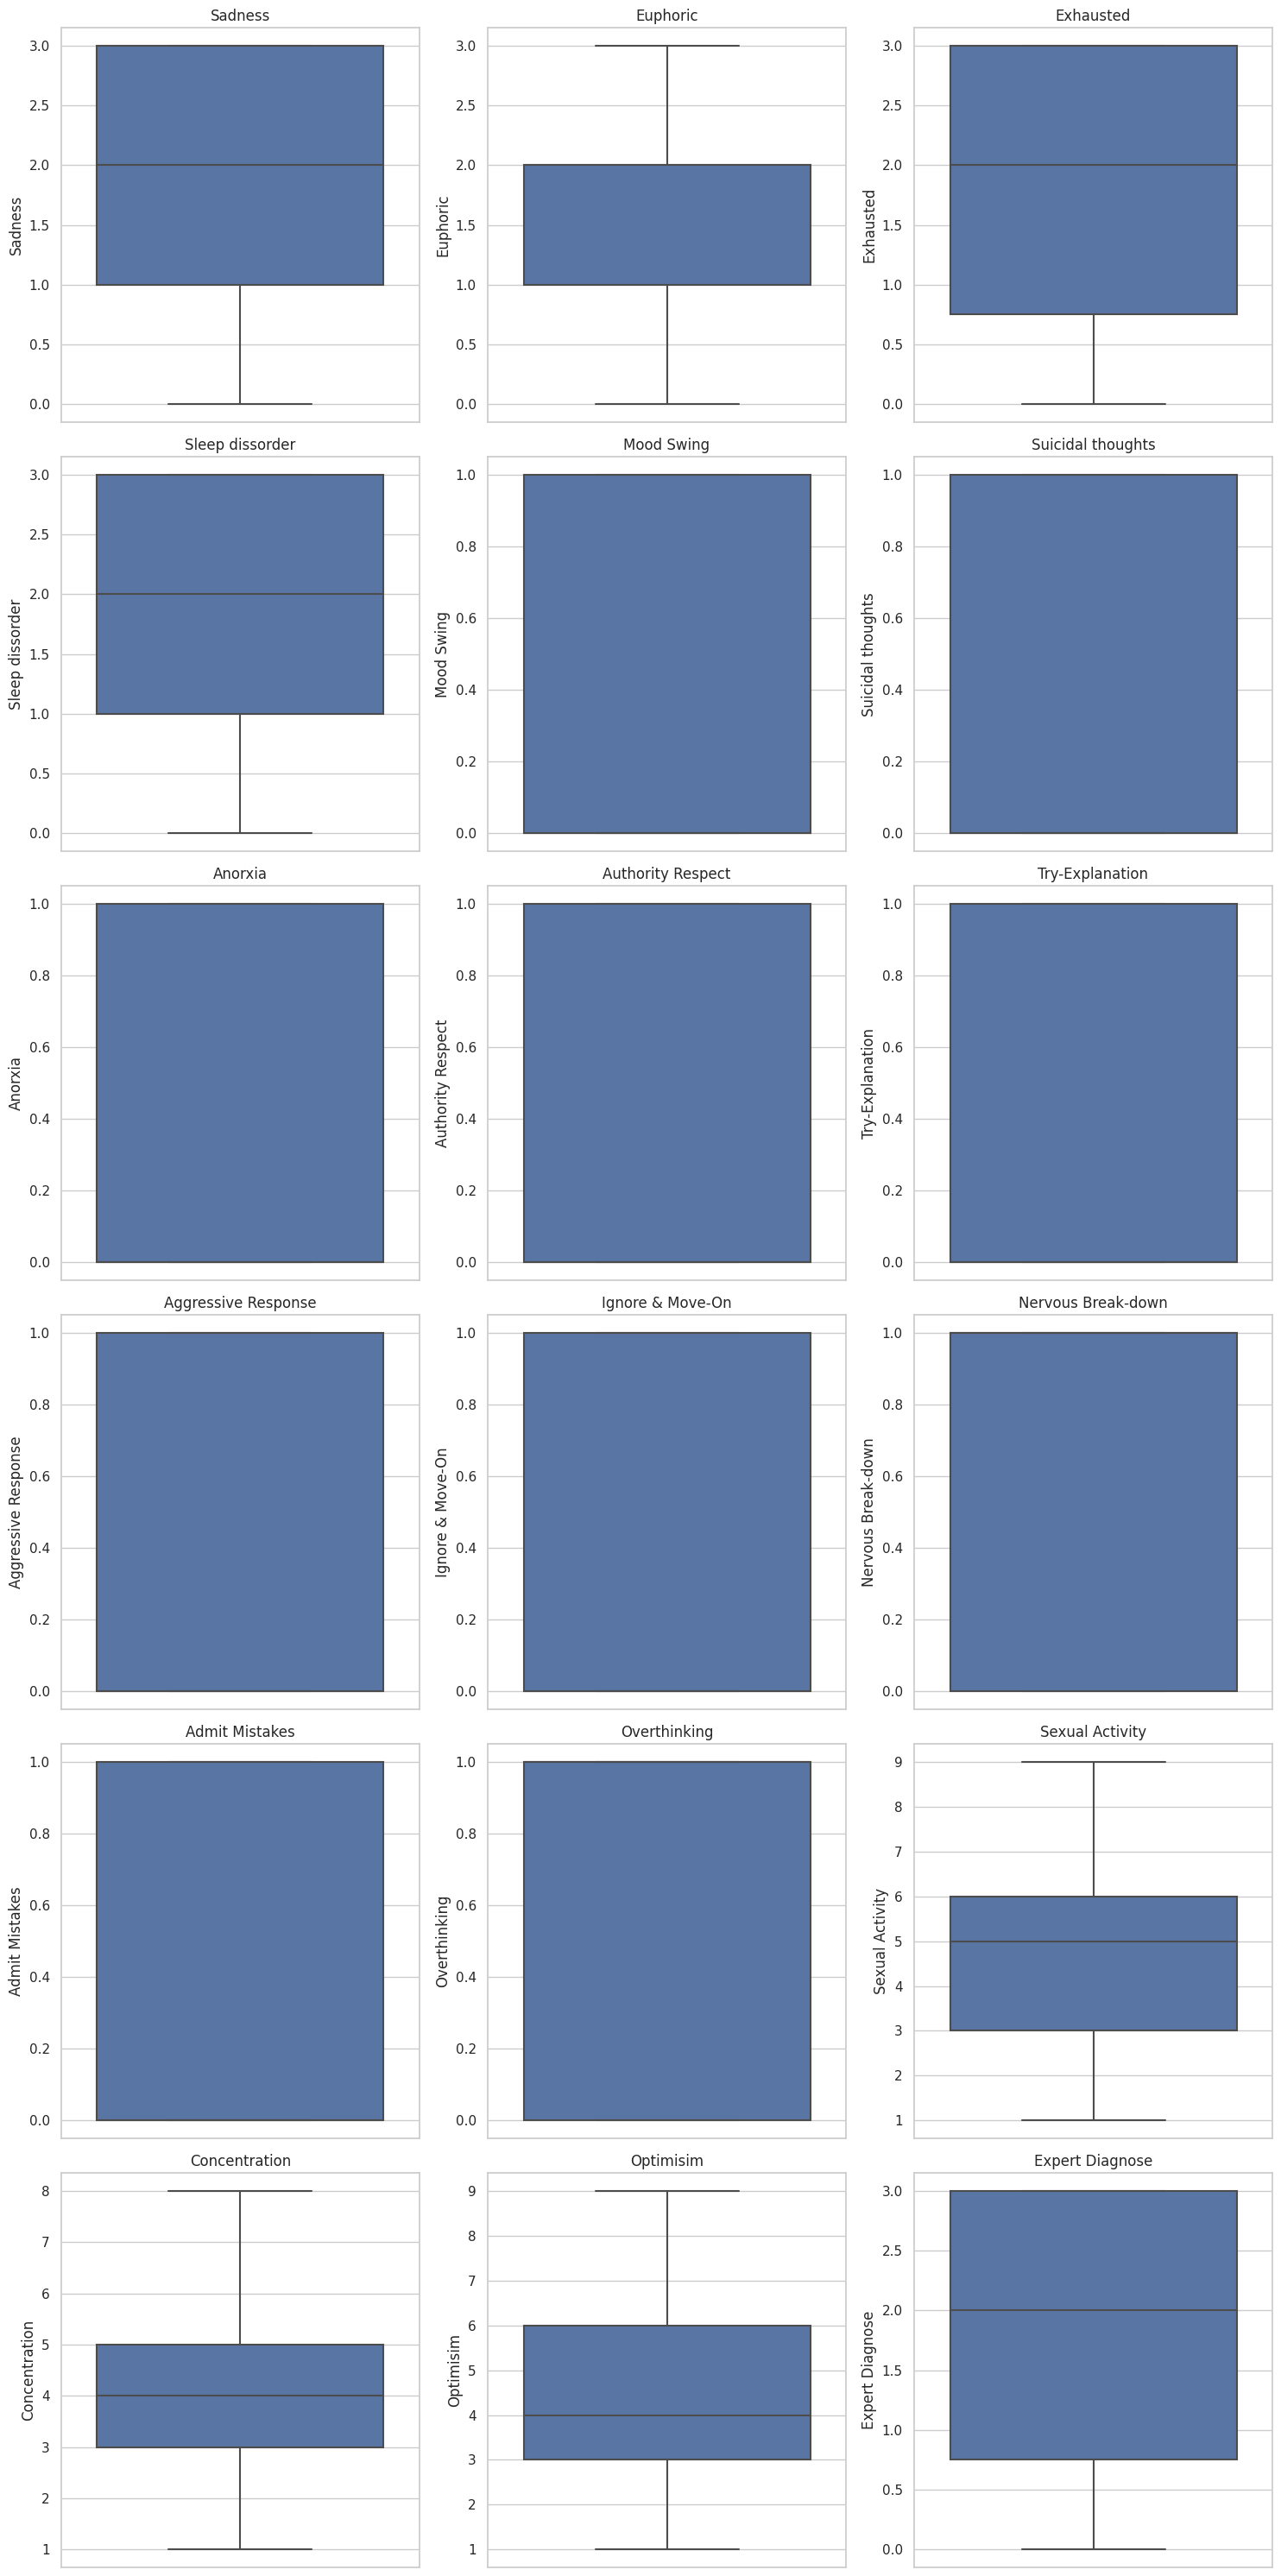

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical columns
numerical_cols = [
    "Sadness", "Euphoric", "Exhausted", "Sleep dissorder", "Mood Swing", 
    "Suicidal thoughts", "Anorxia", "Authority Respect", "Try-Explanation", 
    "Aggressive Response", "Ignore & Move-On", "Nervous Break-down", 
    "Admit Mistakes", "Overthinking", "Sexual Activity", "Concentration", 
    "Optimisim", "Expert Diagnose"
]

# Define subplot layout
num_cols = len(numerical_cols)
rows = (num_cols // 3) + (num_cols % 3 > 0)  # 3 box plots per row

# Create subplots
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5))  # Adjust figure size
axes = axes.flatten()  # Flatten for easy iteration

# Generate box plots
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# Remove extra empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [25]:
df

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,3,1,2,2,1,1,0,0,1,0,0,1,1,1,3,3,4,2
1,3,1,3,2,0,1,0,0,0,0,0,0,0,0,4,2,5,3
2,2,0,2,2,1,0,0,0,1,1,0,1,1,0,6,5,7,1
3,3,1,3,0,1,1,1,0,1,0,0,0,0,0,3,2,2,2
4,3,3,2,2,0,0,0,0,0,0,0,1,1,1,5,5,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0,1,3,2,0,1,0,0,1,0,1,0,0,1,2,5,3,3
116,2,2,2,1,1,0,0,0,0,1,0,0,0,1,6,7,8,1
117,3,2,3,2,1,0,1,1,0,0,0,1,0,1,1,5,3,2
118,3,2,1,1,0,1,1,0,1,1,1,0,1,1,7,7,7,3


In [26]:
X = df.iloc[:, :-1]
y = df['Expert Diagnose']

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

# define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state = 0,criterion="entropy")

# instantiate GridSearchCV
grid_search = GridSearchCV(estimator = rf_classifier, param_grid = param_grid, verbose = 0)

# fit the grid search to the data
grid_search.fit(X_train, y_train)

# set the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


# XGBBOOST

In [28]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(num_class=4)
xgb_classifier.fit(X_train, y_train)

y_pred_test = xgb_classifier.predict(X_test)
y_pred_train = xgb_classifier.predict(X_train)

# evaluate the model
# calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.2%}")

# calculate accuracy on the test set
xgb_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Testing Accuracy: {xgb_accuracy:.2%}")

print('Classification report:')
print(classification_report(y_test, y_pred_test))

Training Accuracy: 100.00%
Testing Accuracy: 95.83%
Classification report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         5

    accuracy                           0.96        24
   macro avg       0.96      0.96      0.95        24
weighted avg       0.97      0.96      0.96        24



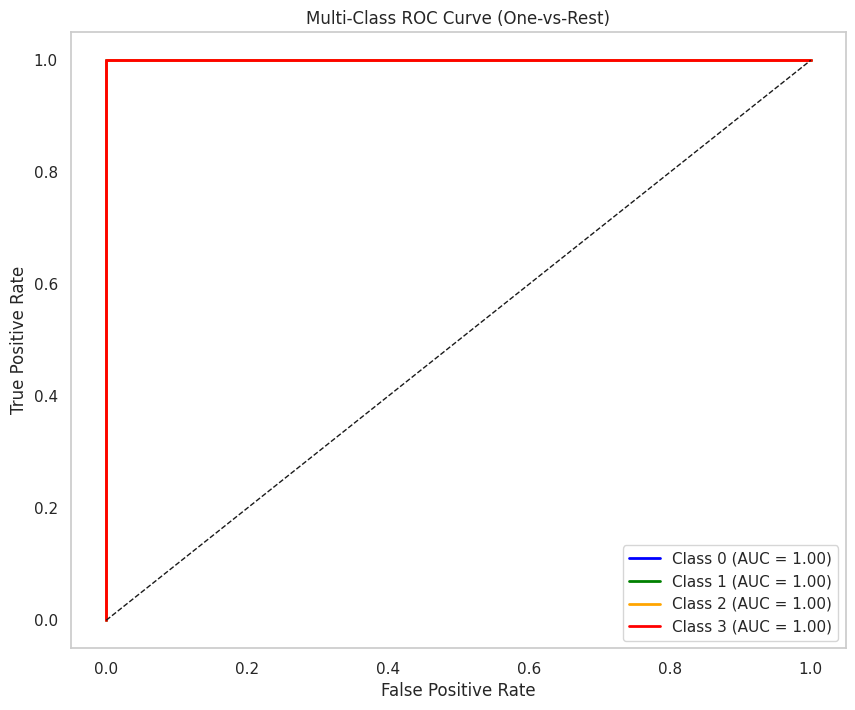

In [29]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
import numpy as np

# Binarize the output (needed for multi-class ROC)
classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)
y_score = xgb_classifier.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'orange', 'red']

for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# SHAP

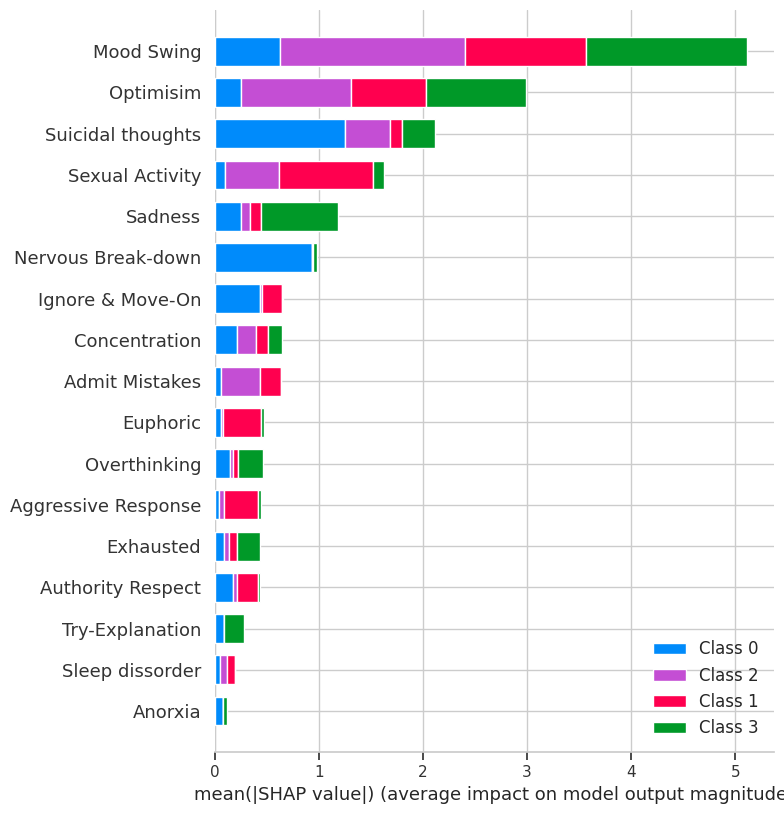

In [30]:
import shap
# Create a SHAP explainer object
explainer = shap.Explainer(xgb_classifier, X_train)
# Compute SHAP values for the testing set
shap_values = explainer.shap_values(X_test)
# Visualize SHAP values
shap.summary_plot(shap_values, X_test)

# LIME

In [31]:
import lime
import lime.lime_tabular
# Create a LIME explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
feature_names=X_train.columns.tolist(), class_names=y_train.unique())
# Explain a single prediction
exp = explainer.explain_instance(X_test.iloc[0].values, xgb_classifier.predict_proba)
# Visualize the explanation
exp.show_in_notebook()

# ELI5

In [32]:
import eli5
# Explain model coefficients
eli5.show_weights( xgb_classifier)
# Explain a single prediction
eli5.show_prediction( xgb_classifier, X_test.iloc[0])

# LightGBM

In [33]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'num_leaves': [31, 63, 127],
    'min_child_samples': [20, 50, 100]
}

# Initialize the LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(random_state=123)

# Perform grid search with cross-validation
grid_search = GridSearchCV(
    estimator=lgb_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the testing set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy on Testing Set:", accuracy)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 65
[LightGBM] [Info] Number of data points in the train set: 96, number of used features: 17
[LightGBM] [Info] Start training from score -1.345472
[LightGBM] [Info] Start training from score -1.473306
[LightGBM] [Info] Start training from score -1.428854
[LightGBM] [Info] Start training from score -1.306252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

# CATBOOST# 

In [34]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 3, 5]
}

# Initialize the CatBoost classifier
catboost_classifier = CatBoostClassifier(random_seed=42, verbose=0)

# Perform grid search with cross-validation
grid_search = GridSearchCV(
    estimator=catboost_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the testing set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy on Testing Set:", accuracy)


Best Hyperparameters: {'depth': 3, 'l2_leaf_reg': 5, 'learning_rate': 0.01}
Accuracy on Testing Set: 1.0


# MODEL DEPLOYMENT

In [35]:
import joblib

# Save model to file
joblib.dump(df, 'mental_disorder_classification.pkl')


['mental_disorder_classification.pkl']

# Checking_for_Resampling

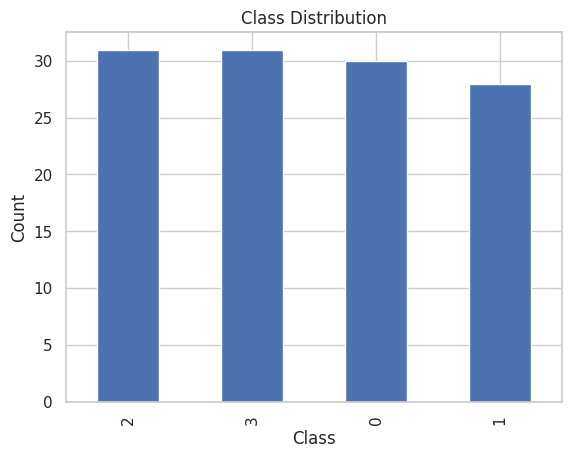

In [36]:
import matplotlib.pyplot as plt

df['Expert Diagnose'].value_counts().plot(kind='bar', title='Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
